In [138]:
import random
import math
import numpy as np
import pandas as pd
import scipy.stats as ss
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

np.random.seed(42)

# Генерация процессов - часть 1

#### Винеровский

In [199]:
class WienerProcess:
    def __init__(self, lenth, mu=0.0, sigma=1.0):
        self.lenth_ = lenth
        self.current_ = 0
        
        self.mu_ = mu
        self.sigma_ = sigma
        
        
        self.value_ = 0.0
        
    def __iter__(self):
        return self

    def __next__(self):
        
        self.current_ += 1
        
        if self.current_ < self.lenth_:
            self.value_ += random.gauss(self.mu_, self.sigma_)
            return self.value_

        raise StopIteration

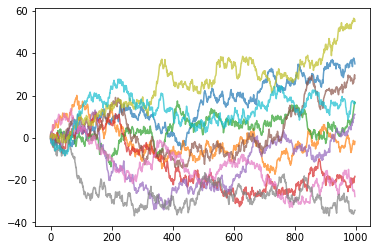

In [200]:
for i in range(0, 10):
    plt.plot([y for y in WienerProcess(1000)], alpha=0.7)
plt.show()

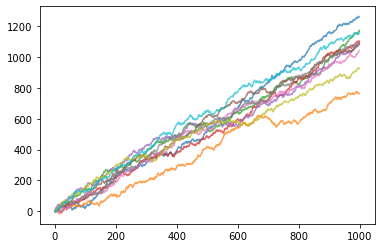

In [201]:
for i in range(0, 10):
    plt.plot([y for y in WienerProcess(1000, 1.0, 4.0)], alpha=0.7)
plt.show()

#### AR(2)

In [202]:
class AR_2_Process:
    def __init__(self, lenth, c=0.0, a_1=0.0, a_2=0.0):
        self.lenth_ = lenth
        self.current_ = 0
        
        self.c_ = c
        self.a_1_ = a_1
        self.a_2_ = a_2
                
        self.value_1_ = c
        self.value_2_ = c
        
    def __iter__(self):
        return self

    def __next__(self):
        
        self.current_ += 1
        
        if self.current_ < self.lenth_:
            
            value_1 = self.value_1_
            value_2 = self.value_2_

            c = self.c_
            a_1 = self.a_1_
            a_2 = self.a_2_
            
            value = c + a_1 * value_1 + a_2 * value_2 + random.uniform(-1.0, 1.0)
            
            self.value_2_ = value_1
            self.value_1_ = value
            
            return value

        raise StopIteration

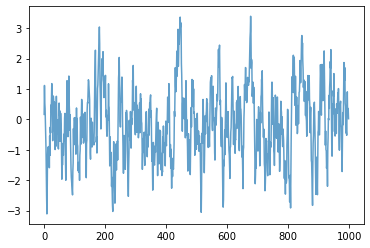

In [203]:
plt.plot([y for y in AR_2_Process(1000, 0.0, 0.95, -0.10)], alpha=0.7)
plt.show()

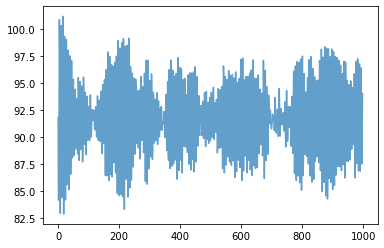

In [204]:
plt.plot([y for y in AR_2_Process(1000, 100.0, 0.90, -0.99)], alpha=0.7)
plt.show()

#### MA(1)

In [205]:
class MA_1_Process:
    def __init__(self, lenth, b=0.0):
        self.lenth_ = lenth
        self.current_ = 0
        
        self.b_ = b
        self.noise_ = random.uniform(-1.0, 1.0)
        
    def __iter__(self):
        return self

    def __next__(self):
        
        self.current_ += 1
        
        if self.current_ < self.lenth_:
            
            next_noise = random.uniform(-1.0, 1.0)
            
            value = next_noise + self.b_ * self.noise_
            
            self.noilse_ = next_noise
            return value

        raise StopIteration

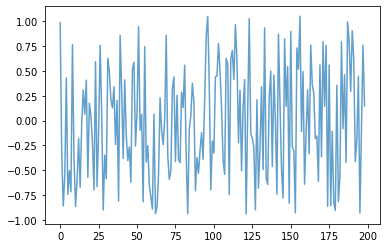

In [206]:
plt.plot([y for y in MA_1_Process(200, 0.15)], alpha=0.7)
plt.show()

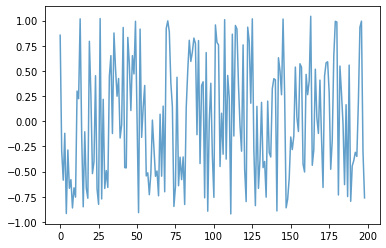

In [207]:
plt.plot([y for y in MA_1_Process(200, 0.99)], alpha=0.7)
plt.show()

#### Марковский процесс (AR(1))

In [208]:
class MarkovProcess:
    def __init__(self, lenth, c=0.0, a=0.0):
        self.lenth_ = lenth
        self.current_ = 0
        
        self.c_ = c
        self.a_ = a
                
        self.value_ = c
        
    def __iter__(self):
        return self

    def __next__(self):
        
        self.current_ += 1
        
        if self.current_ < self.lenth_:
            
            self.value_ = self.c_ + self.a_ * self.value_ + random.random()
            
            return self.value_

        raise StopIteration

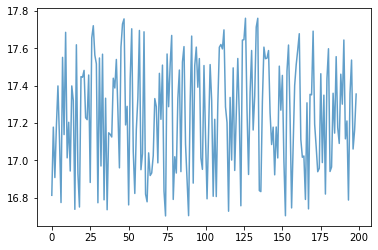

In [209]:
plt.plot([y for y in MarkovProcess(200, 15.0, 0.1)], alpha=0.7)
plt.show()

#### GARCH (1,1)

In [210]:
class GarchProcess:
    def __init__(self, lenth, mean=0.0, c=0.0, a=0.5, b=0.5):
        self.lenth_ = lenth
        self.current_ = 0
    
        self.mean_ = mean
        self.c_ = c
        self.a_ = a
        self.b_ = b
        
        self.residual_ = random.random()
        self.vol_ = random.random()
        
    def __iter__(self):
        return self

    def __next__(self):
        
        self.current_ += 1
        
        if self.current_ < self.lenth_:
            
            next_vol = math.sqrt(self.c_ + self.a_ * (self.residual_**2) + self.b_ * (self.vol_**2))
            next_residual = next_vol * random.uniform(-1.0, 1.0)
            
            self.vol_ = next_vol
            self.residual_ = next_residual
                        
            return self.mean_ + next_residual

        raise StopIteration


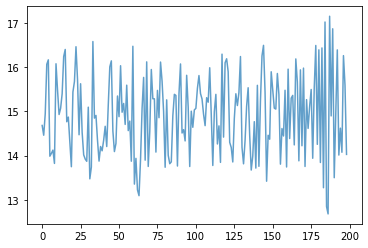

In [212]:
plt.plot([y for y in GarchProcess(200, 15.0, 0.90)], alpha=0.7)
plt.show()

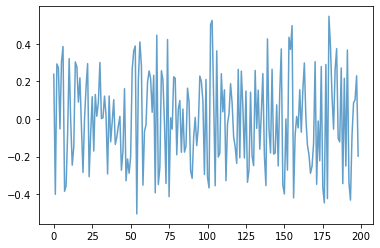

In [188]:
plt.plot([y for y in GarchProcess(200, 0.0, 0.1, 0.99, 0.14)], alpha=0.7)
plt.show()

# Генерация процессов - часть 2

#### геометрическое броуновское движение

In [213]:
class GBMProcess:
    def __init__(self, lenth, mu=0.0, sigma=1.0):
        self.lenth_ = lenth
        self.current_ = 0
        
        self.mu_ = mu
        self.sigma_ = sigma
        
        
        self.value_ = 0.0
        
    def __iter__(self):
        return self

    def __next__(self):
        
        self.current_ += 1
        
        if self.current_ < self.lenth_:
            self.value_ += random.gauss(self.mu_, self.sigma_)
            return math.exp(self.value_)

        raise StopIteration

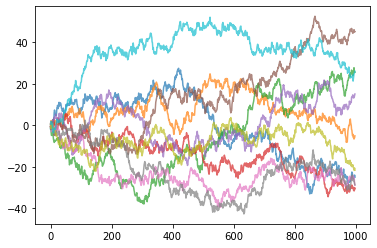

In [214]:
for i in range(0, 10):
    plt.plot([y for y in WienerProcess(1000)], alpha=0.7)
plt.show()

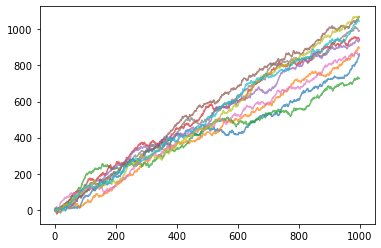

In [215]:
for i in range(0, 10):
    plt.plot([y for y in WienerProcess(1000, 1.0, 4.0)], alpha=0.7)
plt.show()

# Для сгенерированных процессов на всей выборке и на подвыборках посчитать характеристики получившейся при этом выборки (среднее, дисперсию и т.д.) и распределения для нескольких срезов 2-3 процессов (Берём момент времени и по точкам траекторий считаем распределение: для исходных траекторий и их стационарных приращений)

In [234]:
slice_100 = []
slice_500 = []
slice_1000 = []

family = []

for i in range(10000):
    sample = [y for y in AR_2_Process(1100, 0.0, 0.95, -0.10)]
    family.append(sample)
    slice_100.append(sample[100])
    slice_500.append(sample[500])
    slice_1000.append(sample[1000])

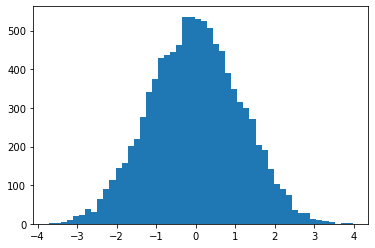

-0.01923369009370591
1.1420177440161965


In [235]:
plt.hist(slice_500, bins=50)
plt.show()

print(np.mean(slice_500))
print(np.std(slice_500))

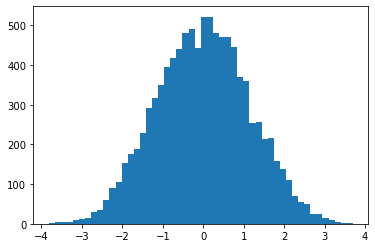

-0.0009151432056381893
1.1461580386670671


In [236]:
plt.hist(slice_1000, bins=50)
plt.show()

print(np.mean(slice_1000))
print(np.std(slice_1000))

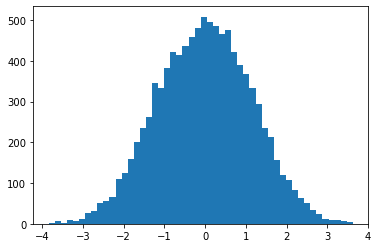

-0.013114326873779853
1.1541007277381228


In [237]:
plt.hist(slice_100, bins=50)
plt.show()

print(np.mean(slice_100))
print(np.std(slice_100))

 # Провести тест на стационарность для некоторых траекторий. Перейти к доходностям. Посчитать VaR для некоторых процессов

In [242]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(family[0])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.472459
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


Ряд не является стационарным

In [265]:
returns = []
current_sample = family[10]

for i in range(1, len(current_sample)):
    returns.append((current_sample[i] - current_sample[i-1])/current_sample[i-1])
    
var = np.quantile(returns, 0.05)
print("Var (historical) = ", var)

Var (historical) =  -2.8720344495180483
